<a href="https://colab.research.google.com/github/SHRAVAN-AMBEER/Machine-Learning-Lab/blob/main/ml(lab)_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df=pd.read_csv("/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/house_price_train.csv")
print(df.head())
print(df.shape)
#constant feature
[col for col in df.columns if df[col].isnull().sum()>0]

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels=['PoolArea'], axis=1),
    df['PoolArea'],
    test_size=0.3,
    random_state=0
)

In [5]:
constant_features = [
    feature for feature in x_train.select_dtypes(include=['number']).columns
    if x_train[feature].std() == 0
]
print(len(constant_features))

0


In [6]:
numeric_cols = x_train.select_dtypes(include=['number']).columns
print(numeric_cols)
print(f"Number of numeric columns: {len(numeric_cols)}")

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Number of numeric columns: 37


In [7]:
x_train.drop(labels= constant_features, axis=1, inplace=True)
x_test.drop(labels=constant_features, axis=1, inplace=True)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels=['PoolArea'], axis=1),
    df['PoolArea'],
    test_size=0.3,
    random_state=0
)

In [9]:

quasi_constant_feat = []

for feature in x_train.columns:

    predominant = (x_train[feature].value_counts() / len(x_train)).sort_values(ascending=False).values[0]
    if predominant > 0.95:
        quasi_constant_feat.append(feature)
len(quasi_constant_feat)

9

In [16]:
x_train.drop(labels=quasi_constant_feat, axis=1, inplace=True)
x_test.drop(labels=quasi_constant_feat, axis=1, inplace=True)
print(x_train.shape, x_test.shape)

(1022, 71) (438, 71)


In [17]:
duplicated_feat = []

for i in range(len(x_train.columns)):
    col_1 = x_train.columns[i]

    for col_2 in x_train.columns[i + 1:]:
        # if the features are duplicated
        if x_train[col_1].equals(x_train[col_2]):
            # and then append the duplicated one to the list
            duplicated_feat.append(col_2)

In [18]:
duplicated_features = set(duplicated_feat)

# Print the number of unique duplicated features
print(len(duplicated_features))

0


In [19]:
duplicated_features = [col for col in duplicated_features if col in x_train.columns]

x_train.drop(columns=duplicated_features, inplace=True)
x_test.drop(columns=duplicated_features, inplace=True)

print(x_train.shape, x_test.shape)

(1022, 71) (438, 71)


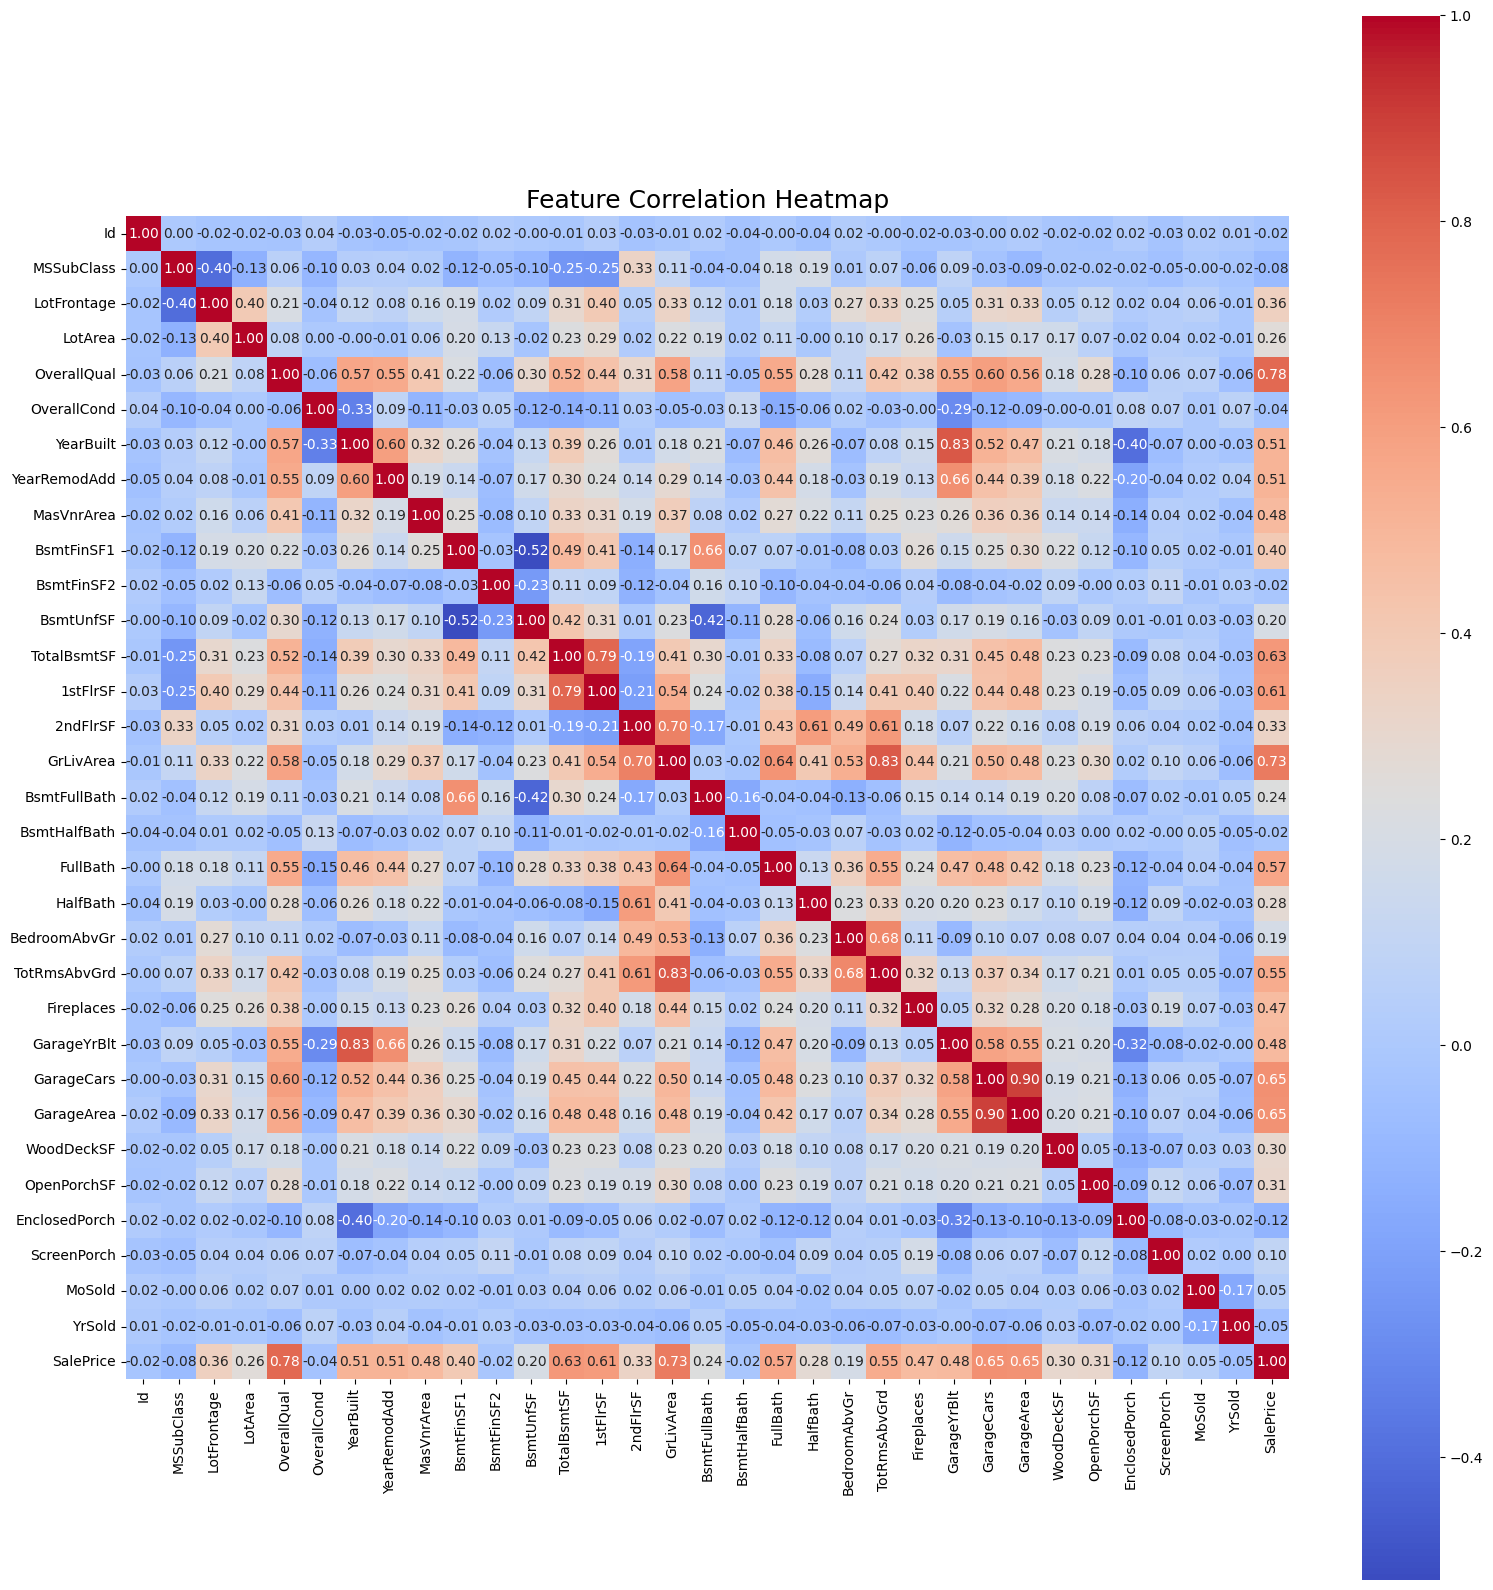

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_x_train = x_train.select_dtypes(include=["number"])

# Compute correlation matrix
corrmat = numeric_x_train.corr()

# Plot heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(corrmat, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Feature Correlation Heatmap", fontsize=18)
plt.tight_layout()
plt.show()

In [21]:
def correlation(dataset, threshold):
    col_corr = set()  # Set to hold the correlated column names
    numeric_dataset = dataset.select_dtypes(include=['number'])  # Select only numeric columns
    corr_matrix = numeric_dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                print(f"{colname1} and {colname2} are correlated: {corr_matrix.iloc[i, j]:.2f}")
                col_corr.add(colname1)  # You can choose colname2 instead if you prefer
    return col_corr
# Call the function with numeric-filtered data
corr_features = correlation(x_train, 0.9)
print(f"\nNumber of highly correlated features: {len(corr_features)}")
print("Correlated features to drop:", corr_features)

# Optional: drop from both train and test
x_train.drop(columns=corr_features, inplace=True)
x_test.drop(columns=corr_features, inplace=True)
x_train.shape, x_test.shape


Number of highly correlated features: 0
Correlated features to drop: set()


((1022, 71), (438, 71))

In [22]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/house_price_train.csv")

# Features and target
X = df.drop(columns=['SalePrice'])
Y = df['SalePrice']

# Select categorical columns and apply one-hot encoding
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Fill missing values with 0
X_encoded = X_encoded.fillna(0)

# Mutual Information for regression
mi_scores = mutual_info_regression(X_encoded, Y)

# Create DataFrame and sort
mi_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Mutual Information Score': mi_scores
}).sort_values('Mutual Information Score', ascending=False)

mi_df

,Feature,Mutual Information Score
4,OverallQual,0.567120
16,GrLivArea,0.482285
12,TotalBsmtSF,0.367161
27,GarageArea,0.366364
6,YearBuilt,0.365255
...,...,...
232,SaleType_CWD,0.000000
236,SaleType_ConLw,0.000000
230,MiscFeature_Shed,0.000000
231,MiscFeature_TenC,0.000000


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
variables = ['Pclass', 'Survived', 'Sex', 'SibSp', 'Parch', 'Embarked']
data = pd.read_csv(
    '/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/titanic_train.csv',
    usecols=variables,
    na_values='?',
    )
data.dropna(subset=['Embarked'], inplace=True)
data.head()


,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("Survived", axis=1),
    data['Survived'],
    test_size=0.3,
    random_state=0,
)
c = pd.crosstab(y_train, X_train['Sex'])
print(c)

Sex       female  male
Survived              
0             56   336
1            158    72


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

In [13]:
filepath = '/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/house_price_train.csv'
df = pd.read_csv(filepath)
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [14]:
X = df.drop(columns=['SalePrice'], axis = 1)
Y = df['SalePrice']
label_encoders = {}
for col in X.columns:
  if X[col].dtype == 'object' :
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Replace negative values with 0
X = X.clip(lower=0)

# Impute missing values with the mean
X.fillna(X.mean(), inplace=True)

if Y.dtype == 'object':
  Y = LabelEncoder().fit_transform(Y.astype(str))

chi_score , p_values = chi2(X,Y)
chi_df = pd.DataFrame({'Feature':X.columns,'Chi Square Score':chi_score, 'P Values':p_values})
chi_df.sort_values('Chi Square Score',ascending=False)
print(chi_df)

          Feature  Chi Square Score  P Values
0              Id      1.548417e+05  0.000000
1      MSSubClass      1.928123e+04  0.000000
2        MSZoning      1.138031e+02  1.000000
3     LotFrontage      5.066301e+03  0.000000
4         LotArea      1.011497e+07  0.000000
..            ...               ...       ...
75        MiscVal      6.253332e+06  0.000000
76         MoSold      7.429758e+02  0.015433
77         YrSold      6.029712e-01  1.000000
78       SaleType      1.874704e+02  1.000000
79  SaleCondition      2.125866e+02  1.000000

[80 rows x 3 columns]


In [15]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y.astype(str))
X_num = X.select_dtypes(include=['number'])

# Impute missing values with the mean
X_num.fillna(X_num.mean(), inplace=True)

f_scores, p_values = f_classif(X_num, y)
f_df = pd.DataFrame({'Feature': X_num.columns, 'F-Score': f_scores, 'P-Value': p_values})
f_df.sort_values('F-Score', ascending=False)
print(f_df)

          Feature   F-Score        P-Value
0              Id  0.931245   8.299751e-01
1      MSSubClass  0.872603   9.659980e-01
2     LotFrontage  1.211057   4.911185e-03
3         LotArea  3.285852   9.894891e-57
4     OverallQual  5.729183  1.344399e-114
5     OverallCond  1.103550   9.200359e-02
6       YearBuilt  2.310198   1.290890e-29
7    YearRemodAdd  1.827603   2.288528e-16
8      MasVnrArea  1.987793   1.176834e-20
9      BsmtFinSF1  1.694719   5.802692e-13
10     BsmtFinSF2  0.994003   5.313044e-01
11      BsmtUnfSF  1.454348   2.190856e-07
12    TotalBsmtSF  2.315290   9.281347e-30
13       1stFlrSF  2.338620   2.045583e-30
14       2ndFlrSF  1.663993   3.342823e-12
15   LowQualFinSF  0.853784   9.828416e-01
16      GrLivArea  3.435110   1.016523e-60
17   BsmtFullBath  1.135567   4.326529e-02
18   BsmtHalfBath  0.847596   9.865674e-01
19       FullBath  2.678847   5.306331e-40
20       HalfBath  1.415171   1.410758e-06
21   BedroomAbvGr  1.235916   2.144007e-03
22   Kitche